In [2]:
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as gp

In [3]:
#Import the data
WHO_df = pd.read_csv('C:\\Users\\shyar\\OneDrive\\Bootcamp\\P1Shyla_Branch\\Data\\WHO.csv')
WHO_df.head()

,Year,Country Code,Country Name,Region,Sex,ICD Code,ICD Category,ICD10 Version,Deaths: All Ages,Deaths: 0-1 Years,Deaths: 1-24 Years,Deaths: 25-44 Years,Deaths: 45-69 Years,Deaths: 70-95+ Years,Deaths: Age Not Specified,Age Format,Deaths: Smoketest All Ages
0,2017,4160,Iceland,Northern Europe,1 - Male,A02,Infectious and parasitic diseases,103,1,0.0,0.0,0.0,0.0,1.0,0.0,0,1.0
1,2017,4160,Iceland,Northern Europe,1 - Male,A04,Infectious and parasitic diseases,103,1,0.0,0.0,0.0,0.0,1.0,0.0,0,1.0
2,2017,4160,Iceland,Northern Europe,1 - Male,A08,Infectious and parasitic diseases,103,1,0.0,0.0,0.0,0.0,1.0,0.0,0,1.0
3,2017,4160,Iceland,Northern Europe,1 - Male,A32,Infectious and parasitic diseases,103,1,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0
4,2017,4160,Iceland,Northern Europe,1 - Male,A41,Infectious and parasitic diseases,103,4,0.0,0.0,0.0,2.0,2.0,0.0,0,4.0


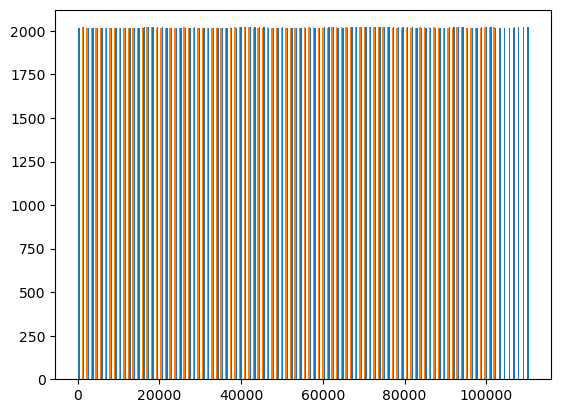

In [24]:

#practice with too many variables
male = WHO_df.loc[(WHO_df["Sex"]=="1 - Male") & (WHO_df["ICD Category"]), "Year"]
female = WHO_df.loc[(WHO_df["Sex"]=="2 - Female") & (WHO_df["ICD Category"]), "Year"]
width = 0.3
plt.bar(np.arange(len(male)), male, width=width)
plt.bar(np.arange(len(female))+ width, female, width=width )
plt.show()


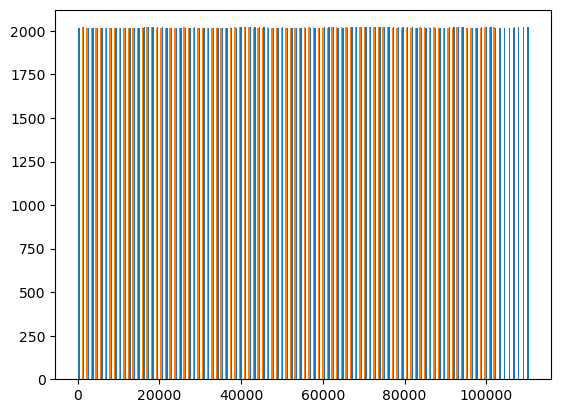

In [25]:
#practice plotted to many variables
male = WHO_df.loc[(WHO_df["Sex"]=="1 - Male"), "Year"]
female = WHO_df.loc[(WHO_df["Sex"]=="2 - Female"), "Year"]
width = 0.3
plt.bar(np.arange(len(male)), male, width=width)
plt.bar(np.arange(len(female))+ width, female, width=width )
plt.show()

In [41]:
#create a dataset that does not have the Unspecified Gender

Boolean_Who = WHO_df[(WHO_df["Sex"]=="1 - Male") | (WHO_df["Sex"]=="2 - Female")]
WHO_group = Boolean_Who.groupby(["Year", "Sex", "Country Name"]).sum()
WHO_group = WHO_group.reset_index()

#visual verification of data
display(WHO_group.value_counts("Country Name"))
display(WHO_group.value_counts("Sex"))


Country Name
Australia                   10
Brazil                      10
Canada                      10
Chile                       10
Iceland                     10
Israel                      10
Japan                       10
Poland                      10
Singapore                   10
Sweden                      10
United States of America    10
Tunisia                      6
Name: count, dtype: int64

Sex
1 - Male      58
2 - Female    58
Name: count, dtype: int64

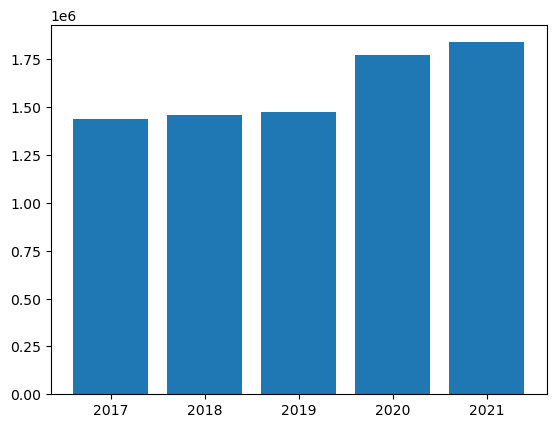

In [30]:
#Practice bargraph Male data only
year = WHO_df.loc[(WHO_df["Sex"]=="1 - Male"), "Year"]
male_deaths = WHO_df.loc[(WHO_df["Sex"]=="1 - Male"), "Deaths: All Ages"]
plt.bar(year, male_deaths)

plt.show()

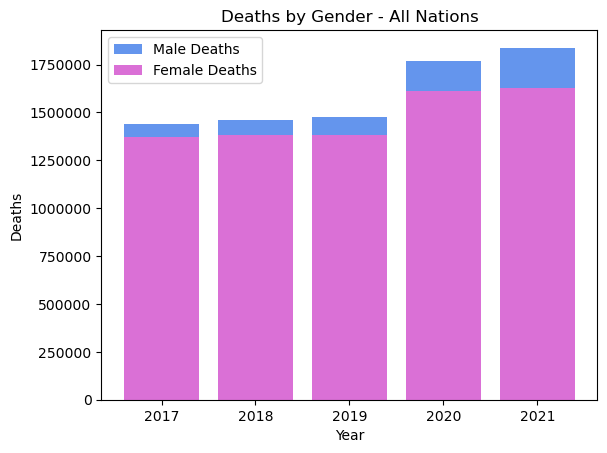

In [11]:
#create a visual with stacked bar graph
year = WHO_df.loc[(WHO_df["Sex"]=="1 - Male"), "Year"]
year2 = WHO_df.loc[(WHO_df["Sex"]=="2 - Female"), "Year"]

male_deaths = WHO_df.loc[(WHO_df["Sex"]=="1 - Male"), "Deaths: All Ages"]
female_deaths = WHO_df.loc[(WHO_df["Sex"]=="2 - Female"), "Deaths: All Ages"]

plt.bar(year, male_deaths, color='cornflowerblue', label = "Male Deaths")
plt.bar(year2, female_deaths, color='orchid', label ="Female Deaths")
plt.xlabel("Year")
plt.ylabel("Deaths")
plt.legend()
plt.title("Deaths by Gender - All Nations")
plt.ticklabel_format(style="plain")

plt.show()

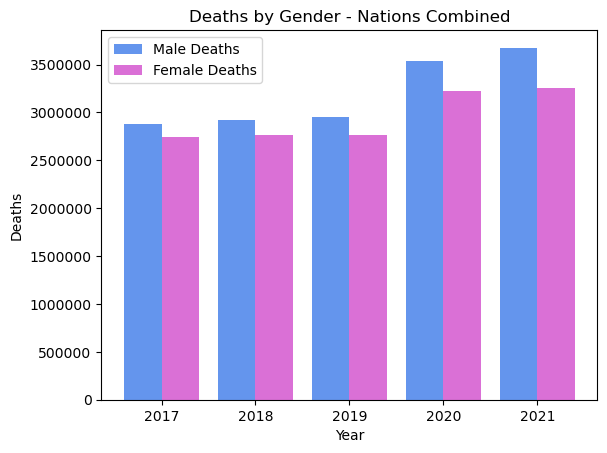

In [45]:
#Create visual to compare Male and Female deaths by year side by side
year = WHO_group.loc[(WHO_group["Sex"]=="1 - Male"), "Year"]
year2 = WHO_group.loc[(WHO_group["Sex"]=="2 - Female"), "Year"]

male_deaths = WHO_group.loc[(WHO_group["Sex"]=="1 - Male"), "Deaths: All Ages"]
female_deaths = WHO_group.loc[(WHO_group["Sex"]=="2 - Female"), "Deaths: All Ages"]

plt.bar(year -0.2, male_deaths, width=0.4,color='cornflowerblue', label = "Male Deaths")
plt.bar(year2 +0.2, female_deaths, width=0.4, color='orchid', label ="Female Deaths")
plt.xlabel("Year")
plt.ylabel("Deaths")
plt.legend()
plt.title("Deaths by Gender - Nations Combined")
plt.ticklabel_format(style="plain")

plt.show()

In [40]:
WHO_group

,Country Code,Country Name,Region,Sex,ICD Code,ICD Category,ICD10 Version,Deaths: All Ages,Deaths: 0-1 Years,Deaths: 1-24 Years,Deaths: 25-44 Years,Deaths: 45-69 Years,Deaths: 70-95+ Years,Deaths: Age Not Specified,Age Format,Deaths: Smoketest All Ages
Year,,,,,,,,,,,,,,,,
2017,124515790,IcelandIcelandIcelandIcelandIcelandIcelandIcel...,Northern EuropeNorthern EuropeNorthern EuropeN...,1 - Male1 - Male1 - Male1 - Male1 - Male1 - Ma...,A02A04A08A32A41AAAB34B44C02C04C06C13C15C16C17C...,Infectious and parasitic diseasesInfectious an...,4422543,13194486,136748.0,369804.0,684578.0,3909246.0,5263614.0,14636.0,14460,13194486.0
2018,122652410,BrazilBrazilBrazilBrazilBrazilBrazilBrazilBraz...,South AmericaSouth AmericaSouth AmericaSouth A...,1 - Male1 - Male1 - Male1 - Male1 - Male1 - Ma...,A010A020A021A022A029A040A041A043A044A047A048A0...,Infectious and parasitic diseasesInfectious an...,4278144,13284456,130886.0,349578.0,679166.0,3964160.0,5297608.0,6076.0,10410,13284456.0
2019,123721810,BrazilBrazilBrazilBrazilBrazilBrazilBrazilBraz...,South AmericaSouth AmericaSouth AmericaSouth A...,1 - Male1 - Male1 - Male1 - Male1 - Male1 - Ma...,A020A021A022A041A042A044A046A047A048A049A052A0...,Infectious and parasitic diseasesInfectious an...,4318912,13433122,127918.0,335916.0,680896.0,4016446.0,5348736.0,5492.0,11560,13433122.0
2020,126117440,TunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTuni...,AfricaAfricaAfricaAfricaAfricaAfricaAfricaAfri...,1 - Male1 - Male1 - Male1 - Male1 - Male1 - Ma...,A010A049A090A099A153A156A161A162A163A165A169A1...,Infectious and parasitic diseasesInfectious an...,4496440,15197766,120072.0,366370.0,806984.0,4677512.0,5904526.0,10086.0,13256,15197766.0
2021,130336020,United States of AmericaUnited States of Ameri...,North AmericaNorth AmericaNorth AmericaNorth A...,1 - Male1 - Male1 - Male1 - Male1 - Male1 - Ma...,A010A020A021A022A029A039A044A045A046A047A048A0...,Infectious and parasitic diseasesInfectious an...,4648488,16223664,121212.0,385654.0,974088.0,5202352.0,5978600.0,14154.0,16303,16223664.0


<Axes: xlabel='Year'>

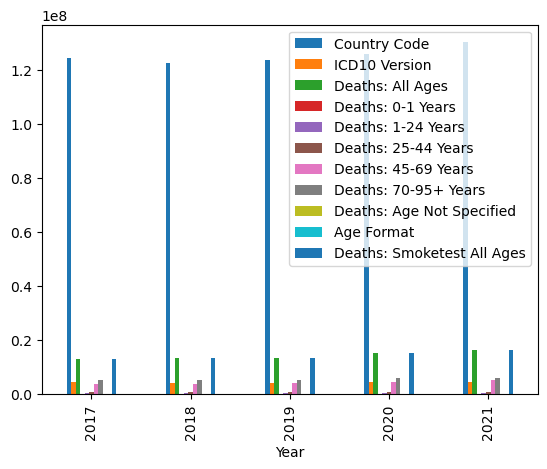

In [37]:
WHO_group.plot(kind='bar')

In [38]:
X = [2017, 2018, 2019, 2020, 2021]

X_axis = np.arange(len(X))

male_deaths = WHO_group.loc[(WHO_group["Sex"]=="1 - Male"), "Deaths: All Ages"]
#female_deaths = WHO_group.loc[(WHO_group["Sex"]=="2 - Female"), "Deaths: All Ages"].sum()
male_deaths
#plt.bar(year -0.2, male_deaths)
#plt.bar(year2 +0.2, female_deaths, width=0.4, color="orchid",label ="Female Deaths")

#plt.xlabel("Year")
#plt.ylabel("Death in Millions")
#plt.title("Deaths by Gender - Nations Combined")
#plt.legend()
#plt.ticklabel_format(style="plain")


plt.show()

In [39]:
male_deaths


Series([], Name: Deaths: All Ages, dtype: int64)

In [5]:
#create a dataset that does not have the Unspecified Gender

Boolean_Who = WHO_df[(WHO_df["Sex"]=="1 - Male") | (WHO_df["Sex"]=="2 - Female")]
WHO_group = Boolean_Who.groupby(["Year", "Sex", "Country Name"]).sum()
WHO_group = WHO_group.reset_index()

display(WHO_group.value_counts("Country Name"))
display(WHO_group.value_counts("Sex"))



Country Name
Australia                   10
Brazil                      10
Canada                      10
Chile                       10
Iceland                     10
Israel                      10
Japan                       10
Poland                      10
Singapore                   10
Sweden                      10
United States of America    10
Tunisia                      6
Name: count, dtype: int64

Sex
1 - Male      58
2 - Female    58
Name: count, dtype: int64

In [23]:
#Check the Data
WHO_group.head(20)

,Year,Sex,Country Name,Deaths: All Ages
0,2017,1 - Male,Australia,165948
1,2017,1 - Male,Brazil,1468940
2,2017,1 - Male,Canada,282198
3,2017,1 - Male,Chile,111546
4,2017,1 - Male,Iceland,2248
5,2017,1 - Male,Israel,45296
6,2017,1 - Male,Japan,1381366
7,2017,1 - Male,Poland,415342
8,2017,1 - Male,Singapore,21348
9,2017,1 - Male,Sweden,89866


In [7]:
#clear out unused cloumns
WHO_group.drop(columns=["Deaths: 0-1 Years","Deaths: 1-24 Years","Deaths: 25-44 Years"], inplace= True)
WHO_group.drop(columns=["Deaths: 45-69 Years","Deaths: 70-95+ Years","Deaths: Age Not Specified","Age Format","Deaths: Smoketest All Ages"], inplace=True)
WHO_group.drop(columns=["Country Code", 'Region', "ICD Code", "ICD Category", "ICD10 Version"], inplace=True)

In [8]:
#group the data to plot
WHO_Country = WHO_group.groupby(["Sex", "Country Name","Deaths: All Ages"]).sum()
WHO_Country.reset_index(inplace=True)

y_death = WHO_Country["Country Name"]
x_M = WHO_Country.loc[WHO_Country["Sex"] == "1 - Male", "Deaths: All Ages"]
x_F = WHO_Country.loc[WHO_Country["Sex"] == "2 - Female", "Deaths: All Ages"] * -1



In [9]:

# Creating instance of the figure 
fig = gp.Figure() 
  
# Adding Male data to the figure 
fig.add_trace(gp.Bar(y= y_death, x = x_M,  
                     name = 'Male', 
                     marker={'color': 'cornflowerblue'},
                     orientation = 'h')) 
  
# Adding Female data to the figure 
fig.add_trace(gp.Bar(y = y_death, x = x_F,
                     marker={'color': 'orchid'}, 
                     name = 'Female', orientation = 'h')) 
  
# Updating the layout for our graph 
fig.update_layout(title = 'Total Deaths by Gender 2017-2021', 
                 title_font_size = 22, barmode = 'relative', 
                 bargap = 0.0, bargroupgap = 0, 
                 xaxis = dict(tickvals = [-15000000,-10000000, -7000000, -6000000, -5000000, -4000000, -3000000, -2000000, -1000000, 
                                          0, 1000000, 2000000, 3000000, 4000000, 5000000, 6000000, 7000000, 10000000, 15000000], 
                                
                              ticktext = ["15M","10M","7M","6M","5M","4M","3M","2M","1M","0",  
                                          "1M","2M","3M","4M","5M","6M","7M","10M","15M"], 
                                
                              title = 'Death in Millions', 
                              title_font_size = 14) 
                 ) 
  
fig.show()